# 🚕Uber Lyft Price Prediction
In this notebook, we analyis the uber and lyft (cab booking service providers) price and create a machine learning model to develope an web application which take the input from the user and give the price amount as an output.

We firstly perform the data analysis over the dataset and extract the knowledge from it. It will help us to create the dataset on which we can train our machine learning model.

**We download the dataset from the Kaggle website:**
https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices?select=cab_rides.csv

### Data Dictionary
1. distance - distance between source and destination
2. cab_type - Uber or Lyft
3. timestamp - epoch time when data was queried
4. destination - destination of the ride
5. source - the starting point of the ride
6. price - price estimate for the ride in USD
7. surge_multiplier - the multiplier by which price was increased, default 1
8. id - unique identifier
9. product_id - uber/lyft identifier for cab-type
10. name - Visible type of the cab eg: Uber Pool, UberXL

Lets load the dataset and perform the data analysis.

In [1]:
# load all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

In [20]:
# load the dataset
df = pd.read_csv('./data/cab_rides.csv')
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [3]:
df.shape

(693071, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [5]:
df.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

Since, we have a lot of target variable as null value. We remove all this columns from the dataset and perform the analysis over the remaining data.

In [65]:
df.dropna(inplace=True)

In [66]:
df.shape

(637976, 10)

In [8]:
df.isna().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

We remove all the null target variable from the dataset. Now we perform the Data analysis over the dataset and extract the information from it.

## Exploratory Data Analysis (EDA)
In this section we perform the exploratory data analysis to understand the relation between the dependent and the independent variables. We also check the frequency of the labels that changes the dependent variable.

In [9]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


**Distance-Price Graph**

* Distance: distance between source and destination
* Price: price estimate for the ride in USD

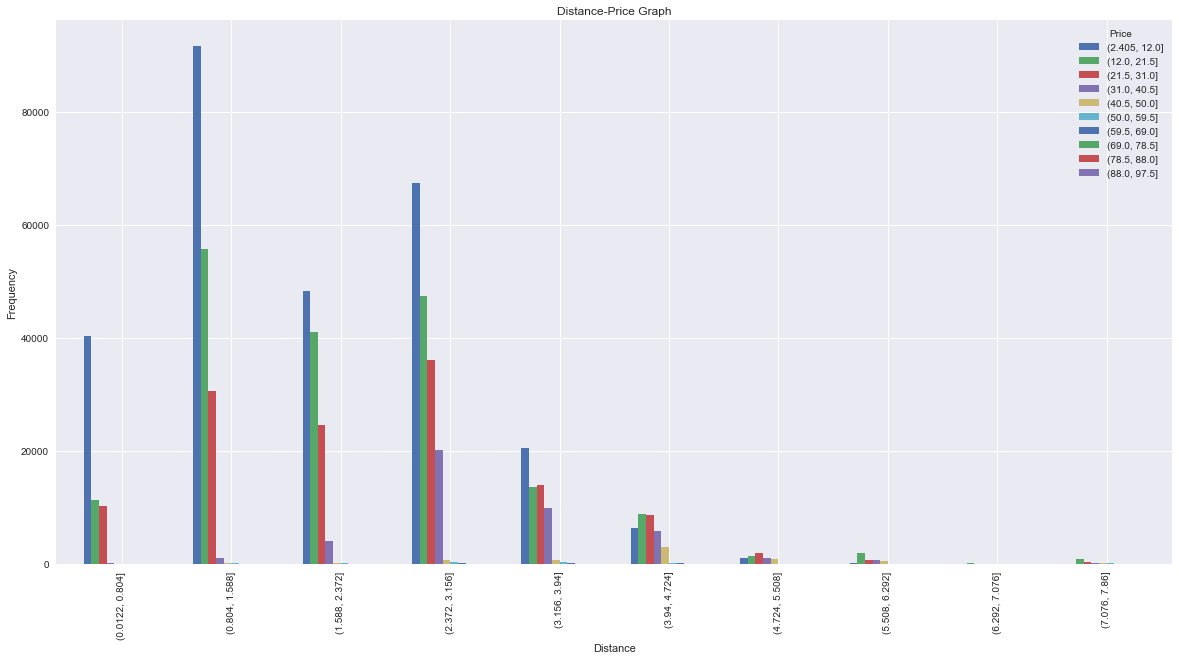

In [21]:
distance = pd.cut(df.distance, bins=10)
price = pd.cut(df.price, bins=10)
dp = pd.crosstab(distance, price)
dp.plot(kind='bar', width=0.7, figsize=(20, 10));
plt.ylabel('Frequency');
plt.xlabel('Distance')
plt.title('Distance-Price Graph');
plt.legend(title = 'Price');

**Cab Type-Price Graph**

* Cab Type: Uber or Lyft
* Price: price estimate for the ride in USD

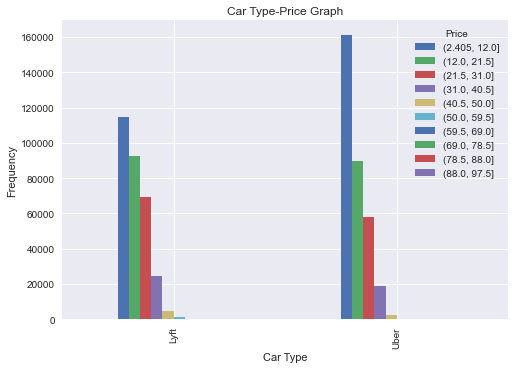

In [11]:
pd.crosstab(df.cab_type, price).plot(kind='bar');
plt.xlabel('Car Type')
plt.ylabel('Frequency')
plt.legend(title='Price')
plt.title('Car Type-Price Graph');

**Destination Graph**

* Destination: destination of the ride 

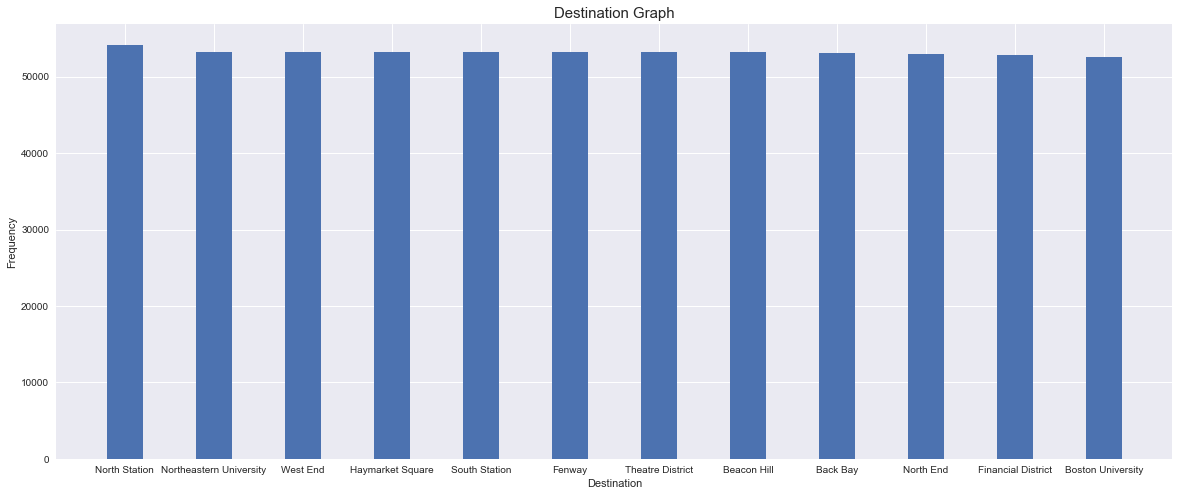

In [12]:
plt.figure(figsize=(20, 8))
plt.bar(df.destination.unique(), df.destination.value_counts(), width=0.4)
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.title('Destination Graph', fontsize=15);

**Source Graph**

* Source: the starting point of the ride

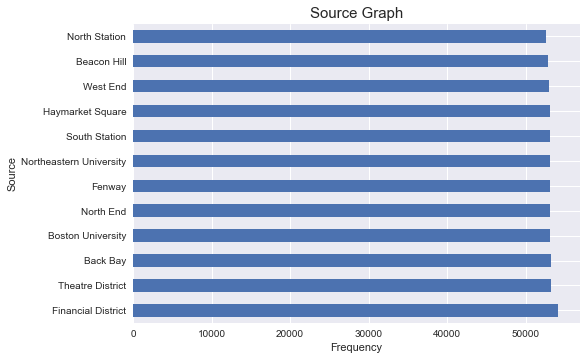

In [13]:
source = pd.DataFrame(df.source.value_counts())
source['Frequency'] = source['source']
source.drop('source', axis=1, inplace=True)
source.index.name = 'Source'
source.plot(kind='barh', legend=None);
plt.title('Source Graph', fontsize=15);
plt.xlabel('Frequency');

**Surge Multiplier Graph**

> **What is Surge Multiplier?**<br><br>
The idea behind surge pricing is to adjust prices of rides to match driver supply to rider demand at any given time.

* Surge Multiplier: the multiplier by which price was increased, default 1


In [14]:
pd.crosstab(df.destination, df.surge_multiplier)

surge_multiplier,1.00,1.25,1.50,1.75,2.00,2.50,3.00
destination,,,,,,,
Back Bay,51455,910,420,200,199,6,0
Beacon Hill,51200,875,450,205,104,6,0
Boston University,51286,1035,395,200,231,20,4
Fenway,51381,940,450,170,203,22,0
Financial District,52412,955,405,220,190,8,2
Haymarket Square,51446,890,390,215,212,16,2
North End,51304,1045,390,170,235,18,2
North Station,50907,800,500,180,178,12,0
Northeastern University,51415,910,435,225,156,24,0


In [15]:
pd.crosstab(df.source, df.surge_multiplier)

surge_multiplier,1.00,1.25,1.50,1.75,2.00,2.50,3.00
source,,,,,,,
Back Bay,50331,1310,515,465,508,66,6
Beacon Hill,50791,1065,590,230,163,0,2
Boston University,50702,1190,670,330,266,12,2
Fenway,50536,1310,695,310,301,14,0
Financial District,52692,825,375,175,126,4,0
Haymarket Square,52737,320,85,5,0,0,0
North End,52781,290,90,10,0,0,0
North Station,51731,630,155,45,15,0,0
Northeastern University,50504,1295,730,355,270,10,0


In [16]:
pd.crosstab(df.cab_type, df.surge_multiplier)

surge_multiplier,1.00,1.25,1.50,1.75,2.00,2.50,3.00
cab_type,,,,,,,
Lyft,286433,11085,5065,2420,2239,154,12
Uber,330568,0,0,0,0,0,0


In [17]:
pd.crosstab(df.name, df.surge_multiplier)

surge_multiplier,1.00,1.25,1.50,1.75,2.00,2.50,3.00
name,,,,,,,
Black,55095,0,0,0,0,0,0
Black SUV,55096,0,0,0,0,0,0
Lux,47040,2217,1013,484,481,0,0
Lux Black,47040,2217,1013,484,481,0,0
Lux Black XL,47040,2217,1013,484,481,0,0
Lyft,47040,2217,1013,484,398,77,6
Lyft XL,47040,2217,1013,484,398,77,6
Shared,51233,0,0,0,0,0,0
UberPool,55091,0,0,0,0,0,0


**Name-Price Graph**

* Name: Visible type of the cab eg: Uber Pool, UberXL
* Price: price estimate for the ride in USD

In [18]:
pd.crosstab(df.name, price)

price,"(2.405, 12.0]","(12.0, 21.5]","(21.5, 31.0]","(31.0, 40.5]","(40.5, 50.0]","(50.0, 59.5]","(59.5, 69.0]","(69.0, 78.5]","(78.5, 88.0]","(88.0, 97.5]"
name,,,,,,,,,,
Black,0,35425,17698,1845,119,5,3,0,0,0
Black SUV,0,0,36278,16540,2035,224,13,2,3,1
Lux,5770,33177,11419,689,138,42,0,0,0,0
Lux Black,0,20656,25213,4591,466,233,74,2,0,0
Lux Black XL,0,0,26948,19088,3798,913,312,85,70,21
Lyft,44580,6434,209,12,0,0,0,0,0,0
Lyft XL,13394,32124,5309,329,63,14,2,0,0,0
Shared,50856,371,6,0,0,0,0,0,0,0
UberPool,52075,2974,40,1,1,0,0,0,0,0


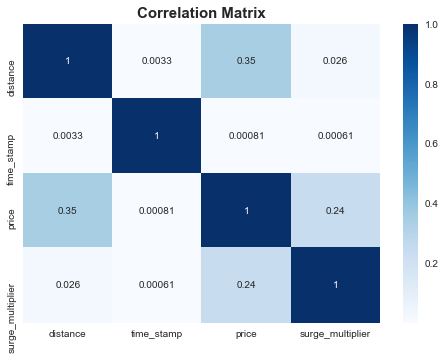

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='Blues');
plt.title('Correlation Matrix', fontsize=15, fontweight='bold');

**Distance-Source-Destination Graph**

* Distance: distance between source and destination
* Source: the starting point of the ride
* Destination: destination of the ride

In [96]:
source_destination = df.source + '-' + df.destination
sd = pd.crosstab(source_destination, df.distance)
sd.to_csv('./data/source_destination.csv')
sd

distance,0.02,0.03,0.04,0.12,0.17,0.27,0.29,0.30,0.35,0.38,...,7.24,7.25,7.34,7.36,7.38,7.45,7.46,7.50,7.62,7.86
row_0,,,,,,,,,,,,,,,,,,,,,
Back Bay-Boston University,0,119,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Back Bay-Fenway,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Back Bay-Haymarket Square,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,28,0,0,0,0,0
Back Bay-North End,0,0,0,0,0,0,0,0,0,0,...,0,0,175,21,0,0,0,0,0,0
Back Bay-Northeastern University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West End-Fenway,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West End-Haymarket Square,0,0,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West End-North End,0,0,0,63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# we combine the source and the destination labels
df['source_destination'] = source_destination

In [98]:
# Since, we combine this columns now we remove it from the dataset
df.drop(['source', 'destination'], axis=1, inplace=True)

In [99]:
df.head()

,distance,cab_type,time_stamp,price,surge_multiplier,id,product_id,name,source_destination
0,0.44,Lyft,1544952607890,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,Haymarket Square-North Station
1,0.44,Lyft,1543284023677,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,Haymarket Square-North Station
2,0.44,Lyft,1543366822198,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,Haymarket Square-North Station
3,0.44,Lyft,1543553582749,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,Haymarket Square-North Station
4,0.44,Lyft,1543463360223,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,Haymarket Square-North Station


## Data Manipulation
In this section we manipulate the dataset and convert the categorical dataset into numerical values using the `LabelEncoder` and `OneHotEncoder` function from the scikit-learn.


In [71]:
cab_type={
    'Lyft': 0,
    'Uber': 1
}

df.cab_type = df['cab_type'].map(cab_type)

In [72]:
# remove the id from the dataset
df.drop('id', axis=1, inplace=True)

In [73]:
categorical_label = ['product_id', 'source_destination', 'name']
one_hot_encoding = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot_encoding, categorical_label)], remainder='passthrough')
transform_df = transformer.fit_transform(df).toarray()

In [92]:
columns = transformer.get_feature_names()
new_column = []
for i in range(len(columns)-5):
    new_column.append(columns[i][12:])
for i in range(len(columns)-5, len(columns)):
    new_column.append(columns[i])

In [108]:
df = pd.DataFrame(transform_df)
df.columns = new_column
df.to_csv('./data/update_data.csv', index=False)

In [119]:
update_df = pd.read_csv('./data/update_data.csv')
update_df.head()

,55c66225-fbe7-4fd5-9072-eab1ece5e23e,6c84fd89-3f11-4782-9b50-97c468b19529,6d318bcc-22a3-4af6-bddd-b409bfce1546,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,997acbb5-e102-41e1-b155-9df7de0a73f2,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,lyft,lyft_line,lyft_lux,lyft_luxsuv,...,Shared,UberPool,UberX,UberXL,WAV,distance,cab_type,time_stamp,price,surge_multiplier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.44,0.0,1.544953e+12,5.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.44,0.0,1.543284e+12,11.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.44,0.0,1.543367e+12,7.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.44,0.0,1.543554e+12,26.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.44,0.0,1.543463e+12,9.0,1.0


In [153]:
X = update_df.drop('price', axis=1)
y = update_df['price']

In [154]:
len(X), len(y)

(637976, 637976)

In [155]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [113]:
extra_tree = ExtraTreesRegressor()
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor()

Now, we plot the graph that contains the labels that are important for the target labels.

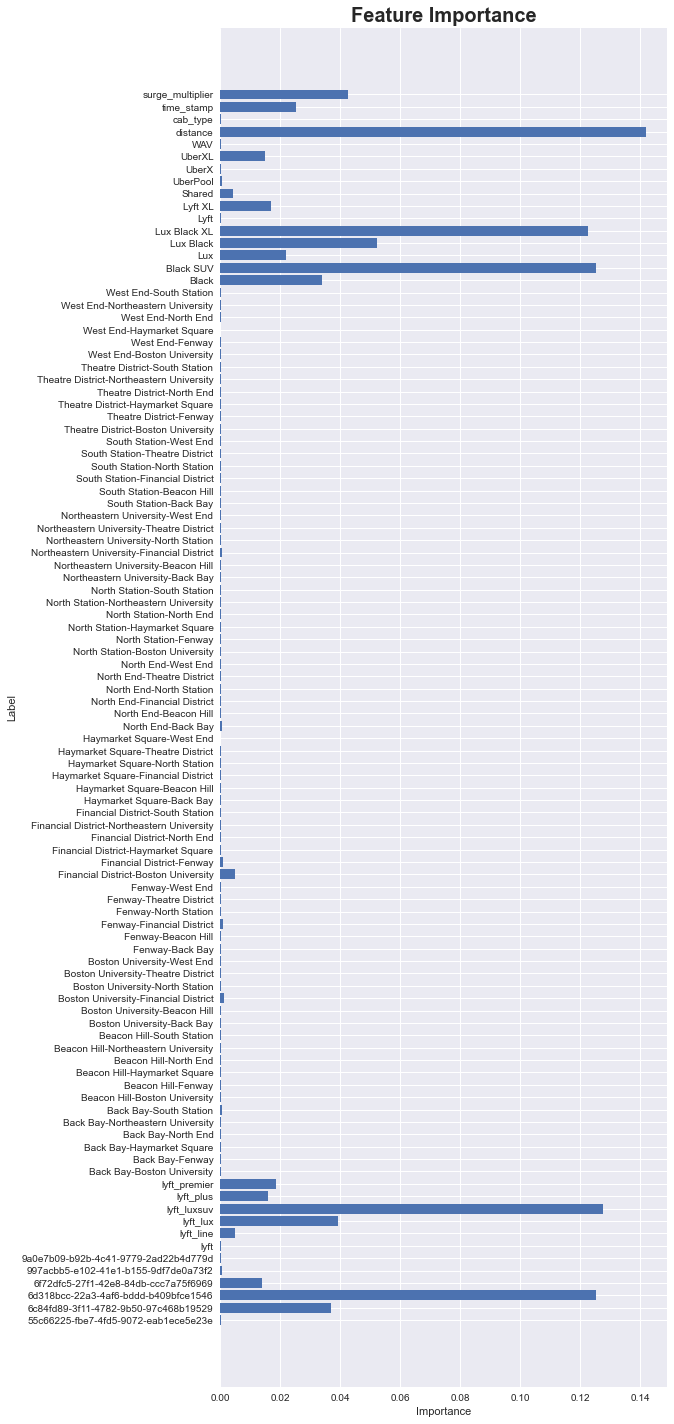

In [119]:
plt.figure(figsize=(8, 25))
plt.barh(X.columns, extra_tree.feature_importances_);
plt.title('Feature Importance', fontsize=20, fontweight='bold');
plt.ylabel('Label')
plt.xlabel('Importance');

## Modeling
In this section, we train the machine learning model and score the trained model using the scoring metrics `r2_score` function. We use the three different regressor model:
1. ExtraTreesRegressor - <span style="color:green">95%</span>
2. RandomForestRegressor - <span style="color:green">96%</span>
3. AdaBoostRegressor - <span style="color:red">34%</span>

### 1. ExtraTreesRegressor

In [120]:
extra_tree_score = extra_tree.score(X_test, y_test)

In [122]:
extra_tree_score

0.9535593580668996

### 2. RandomForestRegressor

In [123]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [124]:
random_forest_score = random_forest.score(X_test, y_test)

In [125]:
random_forest_score

0.9623724028816563

### 3. AdaBoostRegressor

In [126]:
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train, y_train)

AdaBoostRegressor()

In [127]:
ada_boost_score = ada_boost.score(X_test, y_test)

In [128]:
ada_boost_score

0.34435888623669875

In [129]:
score = {
    "ExtraTreesRegressor": extra_tree_score,
    "RandomForestRegressor": random_forest_score,
    "AdaBoostRegressor": ada_boost_score
}

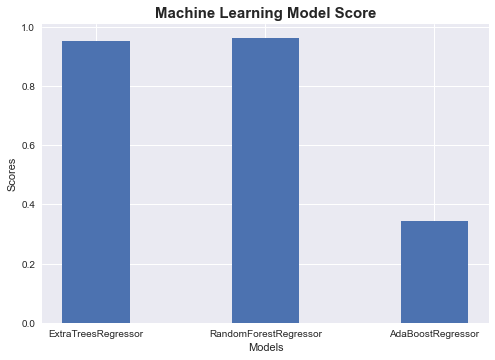

In [130]:
plt.bar(score.keys(), score.values(), width=0.4);
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Machine Learning Model Score', fontsize=15, fontweight='bold');

We get the 95% above score using the ExtraTreesRegressor and RandomForestRegressor model. We move on with the RandomForestRegressor and perform the experimentation to validate that no kind of leakage would be found in future. We also keep it mind that there should be no overfitting and underfitting in our machine learning model that we choose.

## Experimentation
In this section we perform the experimentation over the RandomForestRegressor. Scoring metrics that we are using for the validation are:
1. R2_score
2. Mean Square Error
3. Mean Absolute Error

We also use the `cross_val_score` function to perform the testing over the different parts of the dataset and use the above metrics as a scoring parameter.

### Scoring Metrics

In [131]:
def scoring(X_test, y_test, model):
    """
    This function is used to measure the score of the regressor model.
    X_test: testing dataset without target.
    y_test: testing target
    model: Regressor model
    """
    y_preds = model.predict(X_test)
    r2 = r2_score(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    return{
        "R2_score": r2,
        "Mean Square Error": mse,
        "Mean Absolute Error": mae
    }

In [132]:
scoring(X_test=X_test, 
        y_test=y_test, 
        model=random_forest)

{'R2_score': 0.9623724028816563,
 'Mean Square Error': 3.2803898181352813,
 'Mean Absolute Error': 1.129363182008062}

### Cross Validation Score

In [133]:
score_cross = cross_val_score(estimator=RandomForestRegressor(),
               X=X_test,
               y=y_test,
               cv=5,
               scoring='r2',
               verbose=True,
               n_jobs=-1,
               )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.5min remaining:  8.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.2min finished


In [134]:
score_cross.mean()

0.9612344912788927

Since we are getting good scoring mertrics that we applied over the predcition of our dataset and also cross validation mean is equal to our model score. We are good to go with the `RandomForestRegressor`. Now we save this model and create an web application that predict the price of the Uber/Lyft cab.

## Save the Model

In [135]:
pickle.dump(random_forest, open('random_forest_regressor.pkl', 'wb'))

In [118]:
model = pickle.load(open('random_forest_regressor.pkl', 'rb'))

In [161]:
model.score(X_test, y_test)

0.9623724028816563